## Fetching tensorflow_datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Convuluted way

In [3]:
import tensorflow_datasets as tfds
print(len(tfds.list_builders()))
# list_builder function creates a list of all datasets as strings

259


In [4]:
# Step 1
# call the dataset builder function
celeba_bldr = tfds.builder('celeb_a') 
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [5]:
print(celeba_bldr.info.features['image'])

Image(shape=(218, 178, 3), dtype=tf.uint8)


In [6]:
print(celeba_bldr.info.features['attributes'].keys())

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])


In [7]:
print(celeba_bldr.info.citation)

@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}


In [8]:
# step 2
celeba_bldr.download_and_prepare()

In [9]:
# instantiate the dataset
datasets = celeba_bldr.as_dataset(shuffle_files=True)
# the dataset is already split
datasets.keys()

dict_keys(['train', 'validation', 'test'])

In [10]:
ds_train = datasets['train']

In [11]:
assert isinstance(ds_train,tf.data.Dataset)

In [12]:
example = next(iter(ds_train))
print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['attributes', 'image', 'landmarks'])


In [13]:
# reformat to (features,label) so in can be passed to a model 
ds_train = ds_train.map(lambda item:
                        (item['image'],
                        tf.cast(item['attributes']['Male']
                        ,tf.int32)))

In [14]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))
print(images.shape, labels)


(18, 218, 178, 3) tf.Tensor([0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1], shape=(18,), dtype=int32)


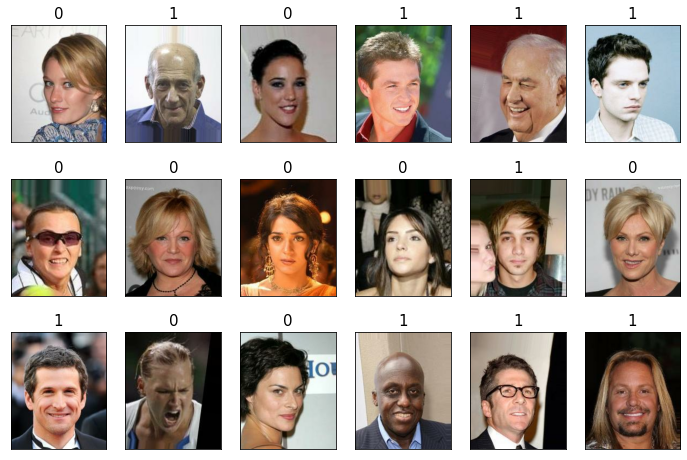

In [15]:
fig = plt.figure(figsize=(12,8))
for i,(image,label) in enumerate(zip(images,labels)):
    ax = fig.add_subplot(3,6,i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label),size=15)
plt.show()

## Second approach

In [16]:
# use the load() function which combines all the steps from convuluted way
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)
print(mnist_info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\james\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [17]:
print(mnist.keys())

dict_keys(['train', 'test'])


In [18]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item:(item['image'],item['label']))
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


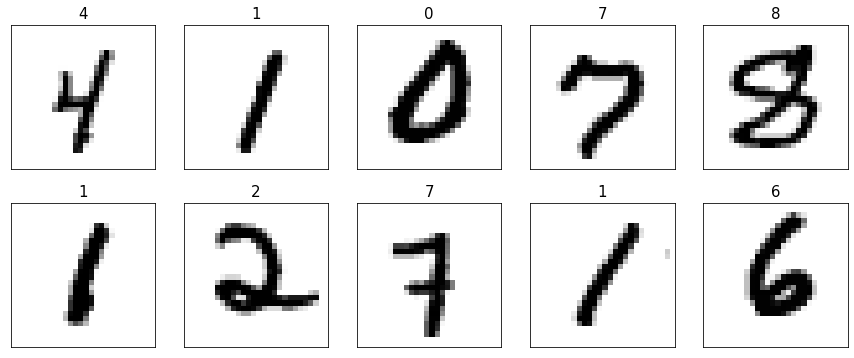

In [25]:
fig = plt.figure(figsize=(15,6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax=fig.add_subplot(2,5,i+1)
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(image[:,:,0],cmap='gray_r')
    ax.set_title('{}'.format(label),size=15)
plt.show()